<H2>
<B>TOPIC    :</B> CLUSTERING (DISTANCE BASED) <br>

<B><CENTER><u>MARKETING ANALYTICS</CENTER></B></u> </h2>

##<b>Importing the packages</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
plt.rc('figure',figsize=(20,10))

#Splitting the data
from sklearn.model_selection import train_test_split

#Caculating the performance
from sklearn import metrics

#Package for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

##<b>Load the data set</b>

In [ ]:
data= pd.read_csv('/content/pseudo_facebook.csv')
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(99003, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

# <b>Handling the missing values</b>

In [ ]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

We have the 175 null values in the gender column and 2 null values in the tenure column. We have 99003 records with 15 attributes. So, by droping the 177 null values will not effect the pattern. So, I am dropping the null values in the present data set. 

In [ ]:
data=data.dropna()
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

After dropping the values there are no null values. 

In [ ]:
data.shape

(98826, 15)

# <h3><b>Correlation Heatmap</h3></b>

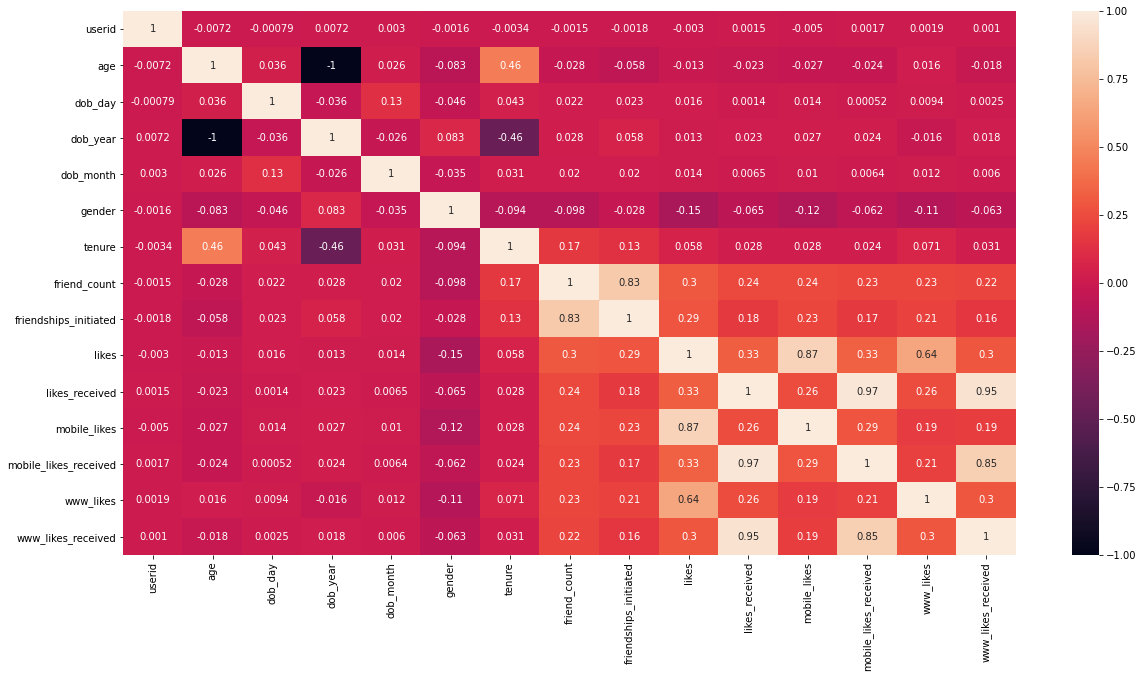

In [ ]:
sns.heatmap(data.corr('pearson'),annot=True)

<h3><i>
The age is positively related to all kinds of likes. Moreover, we donnot require the userid for predicting the age group bin so we drop the userid column. And for predicting the age group I am even dropping the age attribute. 
</h3></i>


In [ ]:
#REMOVING UNNCESSARY COLUMNS
a_data=data.iloc[:, 1:]
a_data.tail()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,68,4,1945,4,0,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,18,12,1995,3,0,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,15,10,1998,5,0,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,23,11,1990,4,0,416.0,2560,185,4506,6516,4506,5760,0,756
99002,39,15,1974,5,0,397.0,2049,768,9410,12443,9410,9530,0,2913


# <B>K - MEANS </B>

In [ ]:
s_data = a_data[(a_data['friend_count']>2500)]

In [ ]:
X=s_data[["friend_count","tenure"]]

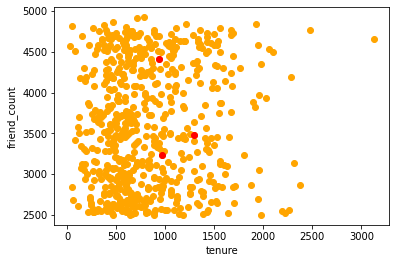

In [ ]:
from sklearn.cluster import KMeans
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["tenure"],X["friend_count"],c='orange')
plt.scatter(Centroids["tenure"],Centroids["friend_count"],c='red')
plt.xlabel('tenure')
plt.ylabel('friend_count')
plt.show()

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["tenure"]-row_d["tenure"])**2
            d2=(row_c["friend_count"]-row_d["friend_count"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["tenure","friend_count"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['tenure'] - Centroids['tenure']).sum() + (Centroids_new['friend_count'] - Centroids['friend_count']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["tenure","friend_count"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-145.17342098956226
-111.62293636155698
-46.86753521548553
-75.52066891619756
-33.47809912188325
-50.19938229897093
-5.503520309477722
-2.0476736144270262
1.7993930989290448
-19.405870243242703
6.140075489900596
0.0


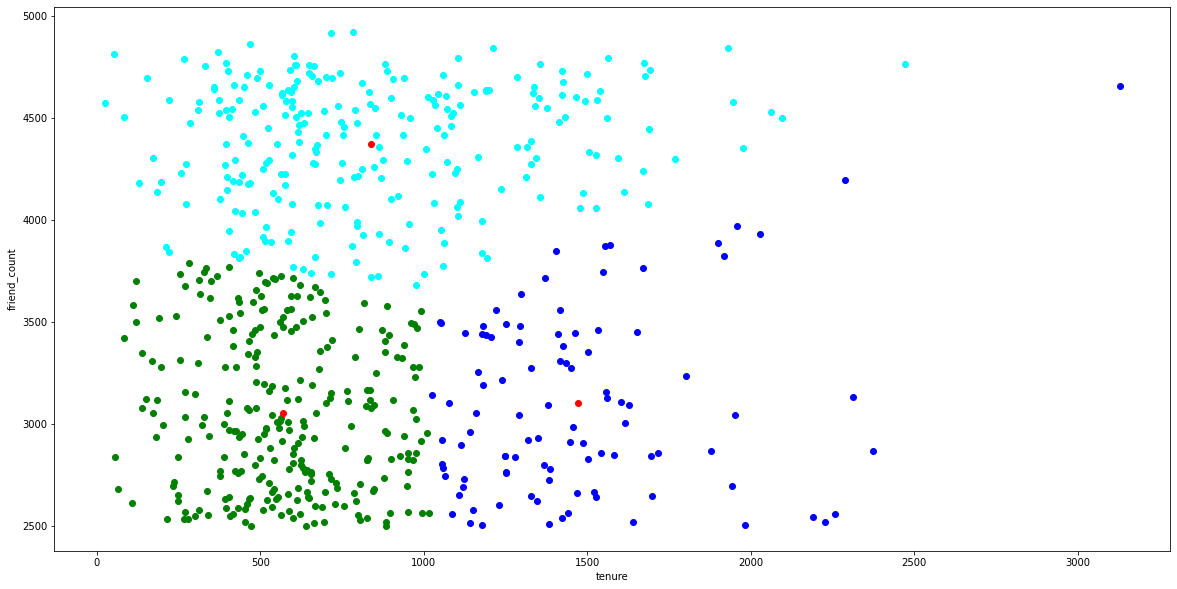

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["tenure"],data["friend_count"],c=color[k])
plt.scatter(Centroids["tenure"],Centroids["friend_count"],c='red')
plt.xlabel('tenure')
plt.ylabel('friend_count')
plt.show()

## <b>K-Means ++ </b>

In [ ]:
from sklearn.cluster import KMeans

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# inertia on the fitted data
kmeans.inertia_

403828915.3905075

We got an inertia value of almost 403828915

Text(0, 0.5, 'Inertia')

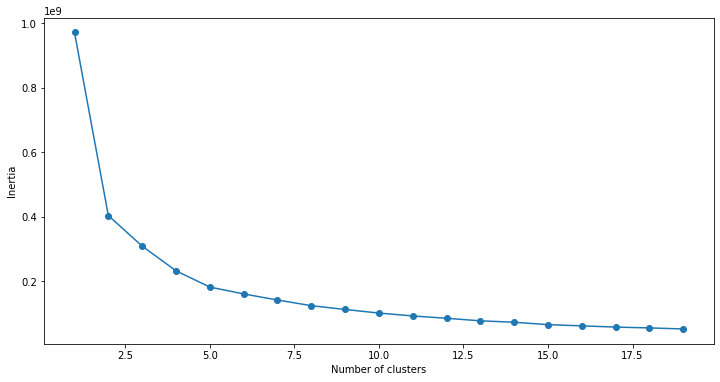

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

From the plot we can see that, the clustering is optimistic for k=3-5

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)

In [ ]:
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    187
1    164
4    138
2     81
3     57
Name: cluster, dtype: int64

So, there are 187 data points belonging to cluster 1 (index 0), 164 points in cluster 2 (index 1), 138 data points belonging to cluster 5 (index 4), 81 data points belonging to cluster 3 (index 2) and 57 data points belonging to cluster 4 (index 3).

# <b>K-MODE </b>

In [ ]:
#!pip install kmodes
from kmodes.kmodes import KModes

# defining the kmeans function with initialization as k-means++
kmode = KModes(n_clusters=3)

# fitting the k means algorithm on scaled data
kmode.fit(X)

KModes(cat_dissim=<function matching_dissim at 0x7f68864aa830>, init='Cao',
       max_iter=100, n_clusters=3, n_init=1, n_jobs=1, random_state=None,
       verbose=0)

In [ ]:
# k means using 5 clusters and k-means++ initialization
km = KModes(n_jobs = -1, n_clusters = 5)
km.fit(X)
pred = km.predict(X)

In [ ]:
frame = pd.DataFrame(X)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    274
1    213
2     99
3     38
4      3
Name: cluster, dtype: int64

So, there are 274 data points belonging to cluster 1 (index 0), 213 points in cluster 2 (index 1), 99 data points belonging to cluster 3 (index 2), 38 data points belonging to cluster 4 (index 3) and 3 data points belonging to cluster 5 (index 4).

# <B>K - MEDIANS </B>

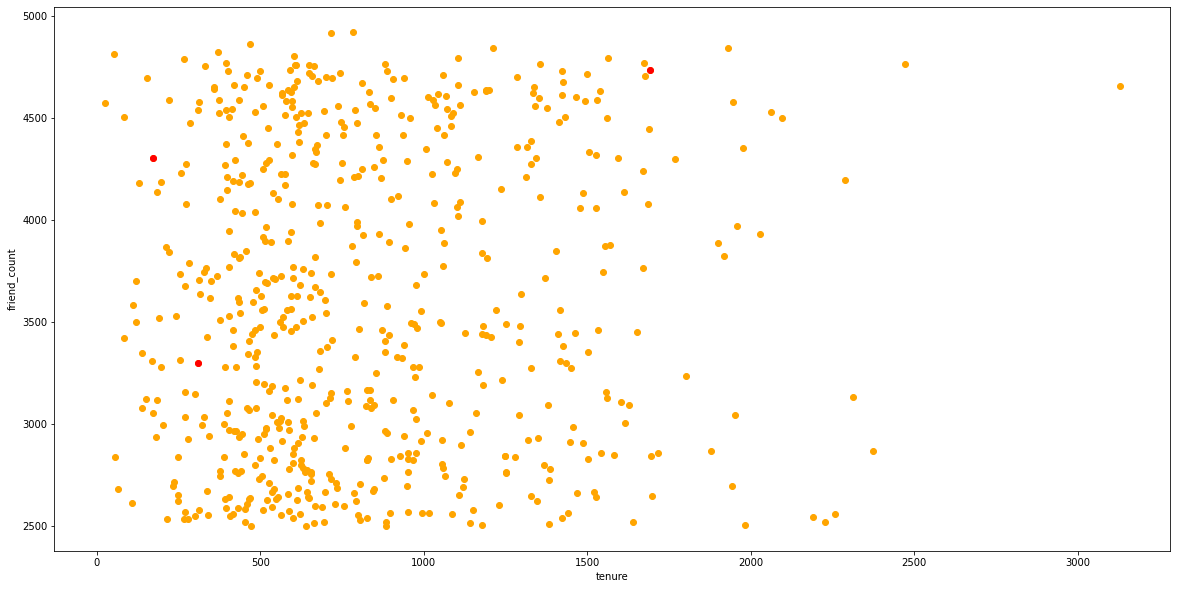

In [ ]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["tenure"],X["friend_count"],c='orange')
plt.scatter(Centroids["tenure"],Centroids["friend_count"],c='red')
plt.xlabel('tenure')
plt.ylabel('friend_count')
plt.show()

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["tenure"]-row_d["tenure"])**2
            d2=(row_c["friend_count"]-row_d["friend_count"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).median()[["tenure","friend_count"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['tenure'] - Centroids['tenure']).sum() + (Centroids_new['friend_count'] - Centroids['friend_count']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).median()[["tenure","friend_count"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-196.5
-83.0
-21.0
2.0
3.0
11.0
16.0
0.0


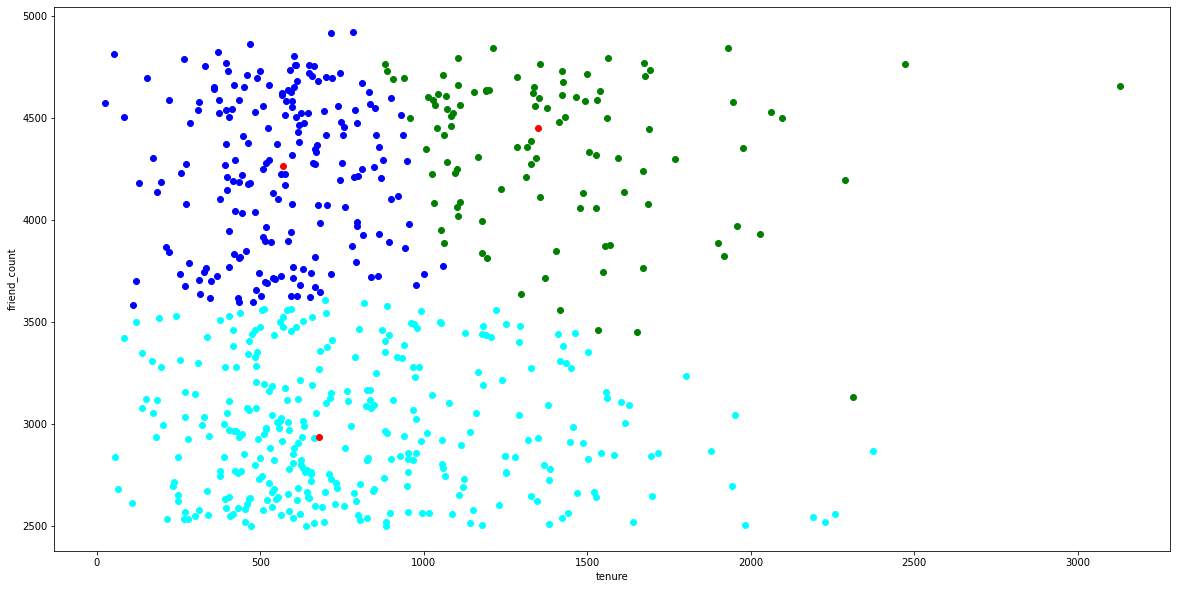

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["tenure"],data["friend_count"],c=color[k])
plt.scatter(Centroids["tenure"],Centroids["friend_count"],c='red')
plt.xlabel('tenure')
plt.ylabel('friend_count')
plt.show()

## <b> Built in (Not flexible for use) </b>

In [ ]:
#!pip install pyclustering
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample

In [ ]:
# Create instance of K-Medians algorithm.
initial_medians = [[0.0, 0.1], [2.5, 0.7]]
kmedians_instance = kmedians(X,initial_medians)

In [ ]:
# Run cluster analysis and obtain results.
kmedians_instance.process()
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()

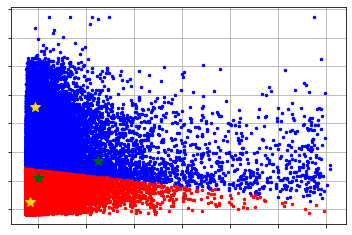

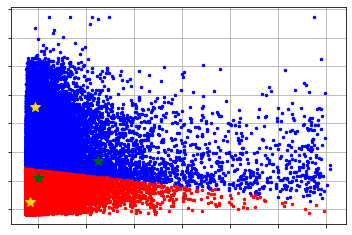

In [ ]:
# Visualize clustering results.
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X)
visualizer.append_cluster(initial_medians, marker='*', markersize=10)
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()

# <b><CENTER> INFERENCE</CENTER> </B> 


For this particular analysis, i am tring to check the relationship between the friendcount and the tenure of facebook user, so that i can recommend them with more friends if their friend count is less, or if their friend count is more, then i will shift those users to other category where only marketing of products is focused rather than friend requests(spreading the network).

<br>

To analyse this, I have used below 3 types of Clustering 
1. K-Means
2. K-Medians
3. K-Modes

<br>

When the clustering was done using k-means, the intra-cluster points distance was less, and the clusters where well categorised. Whereas, when using the k-medians clustering the intra-cluster distance was more, which was not good indicator for analysis. Coming to the K-Mode clustering, as we know that it depends on the ffrequency of the datapoints. Since, we just consider the sample from the population, it is not advisable to go with the k-mode method. The K-Mean++ is the best suggested method for descriptive analysis, where as the k-mode is best suitable for experimental results analysis.

<br>

<b><u>Results:-</b><br></u>

<i><u><b>K-Means- </i></u></b>

There are 187 data points belonging to cluster 1 (index 0), 164 points in cluster 2 (index 1), 138 data points belonging to cluster 5 (index 4), 81 data points belonging to cluster 3 (index 2) and 57 data points belonging to cluster 4 (index 3).

0  --->    187 <br>
1  --->    164 <br>
4  --->   138 <br>
2  --->    81 <br>
3  --->    57 <br>

<u><i><b>K-Modes-</i></u></b>

There are 274 data points belonging to cluster 1 (index 0), 213 points in cluster 2 (index 1), 99 data points belonging to cluster 3 (index 2), 38 data points belonging to cluster 4 (index 3) and 3 data points belonging to cluster 5 (index 4).

0 --->  274 <br>
1 --->  213 <br>
2 --->   99 <br>
3 --->  38 <br>
4 --->   3 <br>


